<a href="https://colab.research.google.com/github/nadicika/PCVK/blob/main/Pertemuan3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **12. Inthania Nadicika Kurniawan (2141720012) / TI-3C**

**PRAKTIKUM**

Akses folder images pada Google Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Transformasi Linier Brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


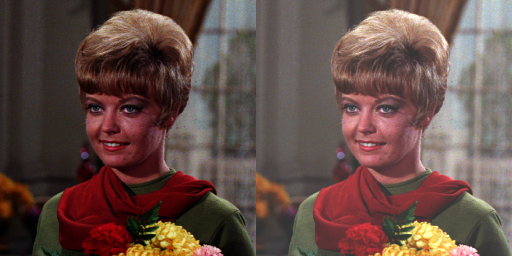

In [40]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)


final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut

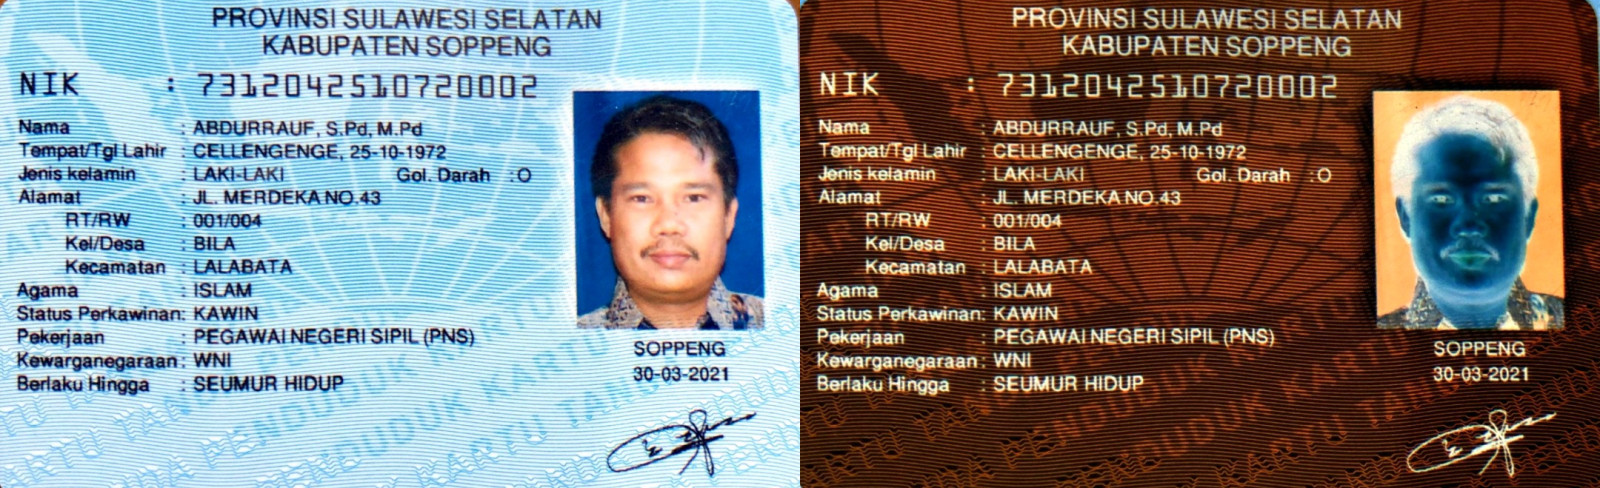

In [41]:
original = cv.imread('/content/drive/MyDrive/PCVK/images/KTP.jpeg')
negative_image = np.copy(original)

#mengubah setiap nilai piksel menjadi negative
negative_image = 255 - original

final_frame = cv.hconcat((original, negative_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 hingga 3.0]: 3


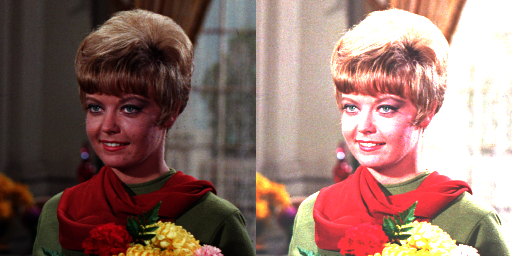

In [42]:
original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff')

print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')

#input nilai kecerahan dari pengguna
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  if brightness < -255 or brightness >255:
    print('Error, nilai brightness harus dalam rentang -255 hingga 255')
except ValueError:
  print('Error, not a number')

#input nilai kontras dari pengguna
try:
  contrast = float(input('Masukkan nilai kontras [1.0 hingga 3.0]: '))
  if contrast <1.0 or contrast > 3.0:
    print('Error, nilai contrast harus dalam rentang 1.0 hingga 3.0')
except ValueError:
  print('Error, not a number')

#mengubah tingkat kecerahan dan kontras citra
else:
  for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
        brightness_contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness,0,255)

final_frame = cv.hconcat((original, brightness_contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


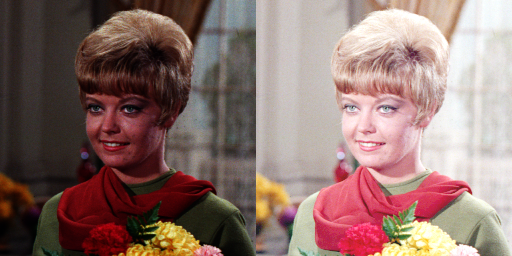

In [43]:
original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff')

print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')

#input nilai kecerahan dari pengguna
try:
  const = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(const * (np.log(1 + original[y,x,c])), 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut

a. Averaging

a. Averaging


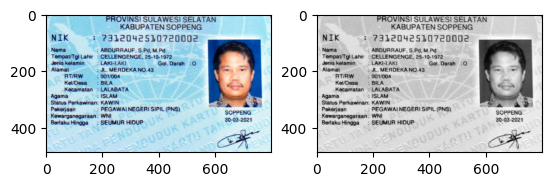

In [44]:
base_image = cv.imread('/content/drive/MyDrive/PCVK/images/KTP.jpeg')

#implementasi grayscale menggunakan metode averaging
average_image = np.zeros(base_image.shape[:2], dtype=np.uint8)

for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        avg = (red + green + blue) // 3
        average_image[y, x] = np.uint8(avg)

# Tampilkan gambar asli dan hasil transformasi grayscale
print('a. Averaging')
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(base_image, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(average_image, cmap='gray')


plt.show()

b. Lightness

b. Lightness


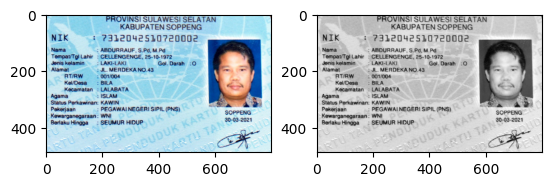

In [45]:
base_image = cv.imread('/content/drive/MyDrive/PCVK/images/KTP.jpeg')

# Implementasi Grayscale menggunakan metode Lightness
lightness_image = np.zeros(base_image.shape[:2], dtype=np.uint8)

for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        lightness = (max(red, green, blue) + min(red, green, blue)) // 2
        lightness_image[y, x] = np.uint8(lightness)

print('b. Lightness')
# Plot Lightness Transformation
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(base_image, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
im = plt.imshow(lightness_image, cmap='gray')

plt.show()

c. Luminance

c. Luminance


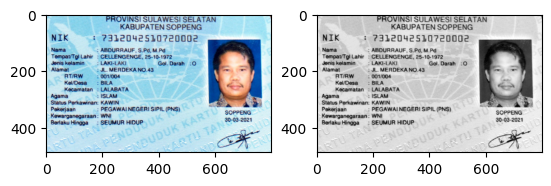

In [46]:
base_image = cv.imread('/content/drive/MyDrive/PCVK/images/KTP.jpeg')

# Implementasi Grayscale menggunakan metode Luminance
luminance_image = np.zeros(base_image.shape[:2], dtype=np.uint8)

for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        luminance = 0.21 * red + 0.72 * green + 0.07 * blue
        luminance_image[y, x] = np.uint8(luminance)

# Plot Luminance Transformation
print('c. Luminance')
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(base_image, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(luminance_image, cmap='gray')

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut

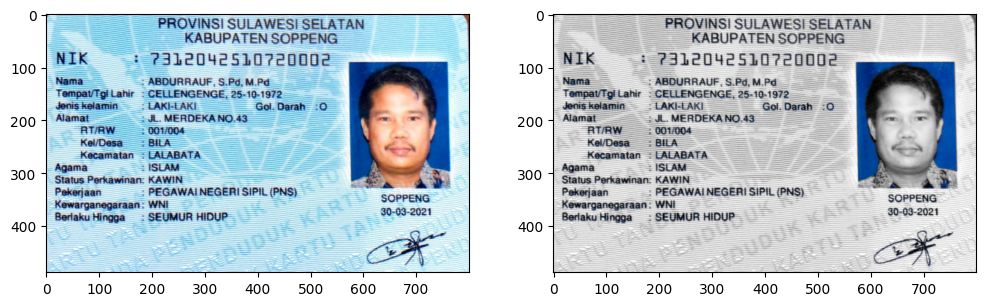

In [84]:
image = cv.imread('/content/drive/MyDrive/PCVK/images/KTP.jpeg')
final_result = np.zeros_like(image)

# Tentukan rentang warna biru (sesuaikan jika perlu)
lower_blue = np.array([100, 0, 0])    # Batas bawah rentang warna biru (format BGR)
upper_blue = np.array([255, 100, 100])  # Batas atas rentang warna biru (format BGR)

# Dapatkan dimensi gambar
tinggi, lebar, kanal = image.shape

# Konversi gambar ke citra grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)



# Perulangan untuk mengiterasi melalui semua piksel gambar
for y in range(tinggi):
    for x in range(lebar):
        # Dapatkan nilai warna BGR piksel saat ini
        piksel = image[y, x]

        # Periksa apakah piksel saat ini berada dalam batas warna biru
        if (piksel >= lower_blue).all() and (piksel <= upper_blue).all():
            final_result[y, x] = image[y, x]  # Biarkan piksel biru tetap seperti aslinya
        else:
            final_result[y, x] = [gray[y, x], gray[y, x], gray[y, x]]  # Ubah bagian non-biru menjadi grayscale

# Tampilkan citra asli dan hasilnya menggunakan Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(final_result, cv.COLOR_BGR2RGB))

plt.show()